In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Discrete Prbability Distributions

We will start with a simpple discrete probability distribution: the Discrete Uniform Distribution.  In python this is the randint distribution.  The discreet uniform distribution with parameters (a,b) constructs a random variable that has an equal probability of being any one of the intergers in the range of [a,b].  An example is rolling a fair 6 sided die.  [See scipy documentation radnint.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.randint.html)

In [252]:
#  import the uniform discrete function
from scipy.stats import randint
#  the low value for a fair die s 1 and the high value is 6; there are 6 possible and equaly likely outcomes
# the pmf = 1/(b-a+1) or 1/n
n=6
# you can run an emperical experiment or simulation to see the emperical probability of the outcome
# if you generate random numbers usng a discrete probability distribution then you can plot these
#  Lets roll a fair sided die; for the interval of low=low, high=high-1
# Here we are saying that there aee 6 outcomes, each of equal probability
# We are using the .rsv atribute to produce random variables that fit the specified probability dstribution
randomvarUniform=randint.rvs(1,7,loc=0)
print(randomvarUniform)

6


In [253]:
# let's roll the die 10 times
randomvarUniform=randint.rvs(0,7,size=10)
print(randomvarUniform)

[5 2 1 2 1 1 5 0 6 2]


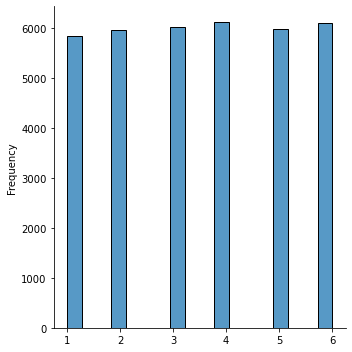

In [254]:
# let's roll it 10,000 times and plot it on a frequency histogram
randomvarUniform=randint.rvs(1,7,size=10000)
ax=sns.displot(randomvarUniform,stat='frequency')

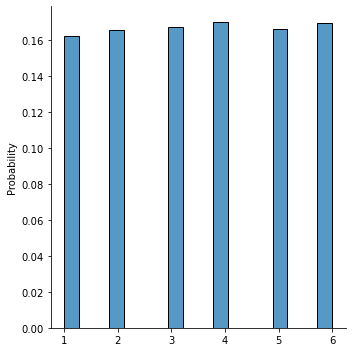

In [255]:
# let's see it as a probability plot
# now can see the emperical probabilities of each outcome is around 0.16667
ax=sns.displot(randomvarUniform,stat='probability')

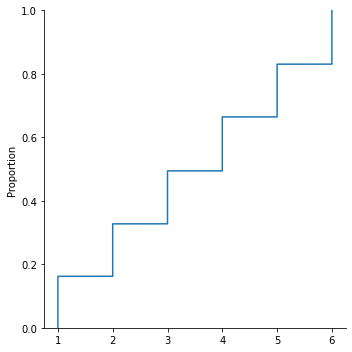

In [256]:
# Plotting the emperical cumuluative distribution function will show the cumulative probabilty up to a certain x
ax=sns.displot(randomvarUniform,kind='ecdf')

In [257]:
# now let's find and plot the theoretical prbability mass function (pmf) based on knowing the parametrs of the distribution
n=6
p=1/n
x=np.arange(1,n+1)
uniformDiscrete_pmf=randint.pmf(x,1,7)
print(uniformDiscrete_pmf)

[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


In [258]:
# This is the same as finding the uniform discrete pmf of the nmbers 1,2,3,4,5,6 using the pmf formula:  PMF=1/n
# now plot the pmf

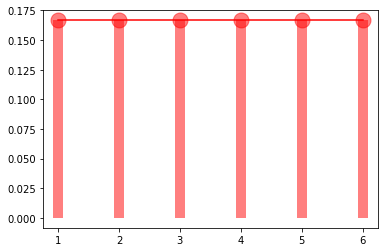

In [259]:
plt.plot(x,uniformDiscrete_pmf,'ro',ms=15,alpha=0.5)
plt.plot(x,uniformDiscrete_pmf,'r')
plt.vlines(x,0,uniformDiscrete_pmf,color='r',linestyle='-',lw=10, alpha=.5)

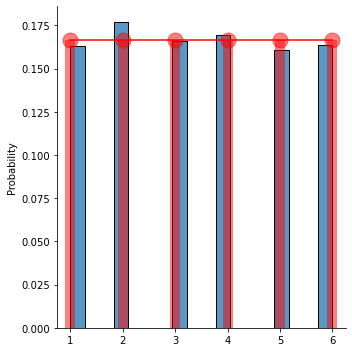

In [260]:
# Let's show the probability distribution on the plot of the emperical probabilities
randint_rvs=randint.rvs(1,7,size=10000)
ax=sns.displot(randint_rvs,stat='probability')
plt.plot(x,uniformDiscrete_pmf,'ro',ms=15,alpha=0.5)
plt.plot(x,uniformDiscrete_pmf,'r')
plt.vlines(x,0,uniformDiscrete_pmf,color='r',linestyle='-',lw=10, alpha=.5)

In [261]:
# The cumulative distribution function shows the cumulative probability that X wil take on a value less than or equal to x
# compute and plot the cdf of a uniform discrete distribution

In [262]:
x=np.arange(1,n+1,1)
uniformDiscrete_cdf=randint.cdf(x,1,7)
print(uniformDiscrete_cdf)

[0.16666667 0.33333333 0.5        0.66666667 0.83333333 1.        ]


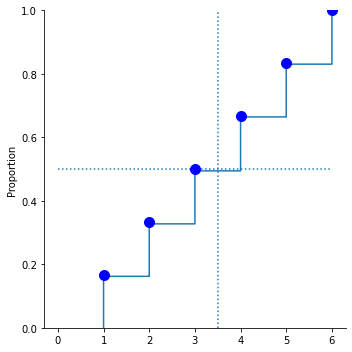

In [263]:
#  plot the cdf of the probabilites as a step function
ax1=sns.displot(randomvarUniform,kind='ecdf')
plt.hlines(0.5,0,6,linestyle=":")
plt.vlines(3.5,0,1,linestyle=":")
plt.plot(x,uniformDiscrete_cdf,'bo',ms=10)

In [264]:
# expected value or mean of the distribution
randint.mean(1,7)

3.5

In [265]:
# at what value x is 50% (0.5 of the total probability) accounted for?
# What is the 50th percentile of this distribution?
# q= percentile=0.5
# ppf is percent point function (inverse of cdf)
randint.ppf(0.5,1,7)

3.0

In [266]:
# variance of the distribution
randint.var(1,7)

2.9166666666666665

# The binomial distribution
Use the [binomial distribution from scipy stats](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html).  binom takes the number of trials and the prbability of a success as shape parameters, where p is the probability of a single success and 1-p is the probability of a single failure. Rember BINS.

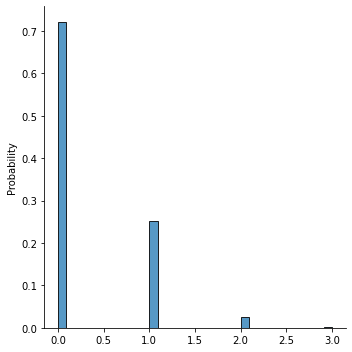

In [267]:
from scipy.stats import binom
# Let's generate some simulated data that follow a binomial distribution and plot the distibuion of this simulated data
# we will say use n=3 and p=0,1 and simulate 10000 randon variables ~Binom(3,0.1)
n=3
p=0.1
binomial_rvs=binom.rvs(n,p,size=10000)
ax1=sns.displot(binomial_rvs,stat='probability')

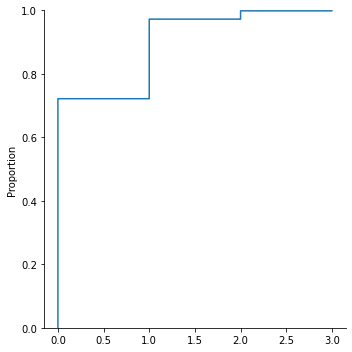

In [268]:
# Plotting the emperical cumuluative distribution function will show the cumulative probabilty up to a certain x
ax1=sns.displot(binomial_rvs,kind='ecdf')

In [269]:
# Now usng the theoretical probability distributions for stats.binom
# Machine 1,2,3 are either working or not working, each machine independnetly has a 10% chance of being down
# you can have {0,1,2,3} machines workinng or not working
# We will work with this modeling the random variable x as a binomial probability distirbution
# What is the probability of each of these numbers of working or not working machines? 
# What is the probability of k= the number of successes (let's define this as machine not working) that you get out of 3 machines running
n=3
p=0.1
x=np.arange(0,n+1)
binomial_pmf=binom.pmf(x,n,p)
print(binomial_pmf)
# the probabilities of having 0,1,2,3 successes

[0.729 0.243 0.027 0.001]


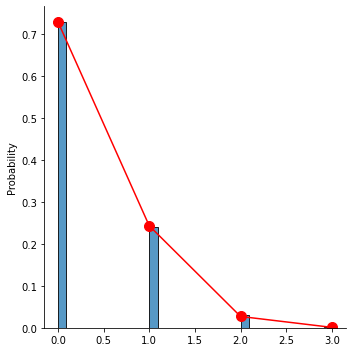

In [270]:
# plot the thoretical probabiities in red over the empircal probabilties in default blue
binomial_rvs=binom.rvs(n,p,size=10000)
ax1=sns.displot(binomial_rvs,stat='probability')
ax2=plt.plot(x,binomial_pmf, 'ro',ms=10)
ax3=plt.plot(x,binomial_pmf, 'r')

In [271]:
# find the cdf of the binomial distribution using the probability distribution parameters
x=np.arange(0,n+1)
binomial_cdf=binom.cdf(x,n,p)
print(binomial_cdf)

[0.729 0.972 0.999 1.   ]


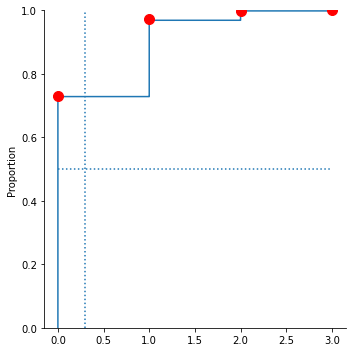

In [272]:
# Plotting the cdf points
ax=sns.displot(binomial_rvs,kind='ecdf')
ax=plt.plot(x,binomial_cdf, 'ro',ms=10)
plt.hlines(0.5,0,3,linestyle=":")
plt.vlines(0.3,0,1,linestyle=":")

In [273]:
# expected value or mean of the distribution
# n= 3, p = 0.10
# for every 3 machines that are running, about 0.3 machines will not be working, on average
binom.mean(n,p)

0.30000000000000004

# The Poisson distribution
Use the [Poisson distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html). It is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant mean rate and independently of the time since the last event.The Poisson distribution can also be used for the number of events in other specified interval types such as distance, area or volume.  ~Pois(rate=lamda=$\lambda$)   

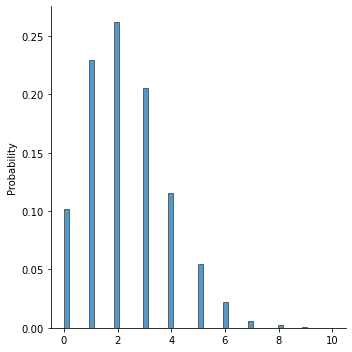

In [274]:
from scipy.stats import poisson
# first again we will look at simulating some data that follow a Poisson distribution
rateA=2.3
poisson_rvs=poisson.rvs(rateA,size=10000)
ax1=sns.displot(poisson_rvs,stat='probability')

Compare this with using the poisson distribution to find probabilities.  If we state that the rate = 2.3 deaths from typhoid fever over a 1-year period, when you assume that the underlying distribution for annual death from typhoid fever is a Poisson distribution, find the probabilitys of the number of deaths.

In [275]:
xPoisson=np.arange(0,10,1)
poisson_pmf=poisson.pmf(xPoisson,rateA)
print(poisson_pmf)
# the probability of count of the number of deaths in 1 year

[0.10025884 0.23059534 0.26518464 0.20330823 0.11690223 0.05377503
 0.02061376 0.00677309 0.00194726 0.00049763]


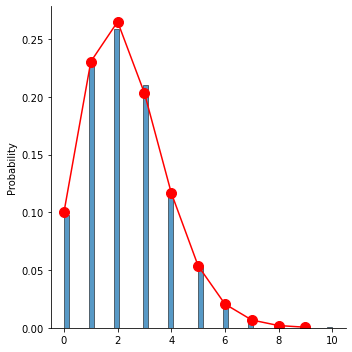

In [276]:
# plot the thoretical probabiities in red over the empircal probabilties in default blue
poisson_rvs=poisson.rvs(rateA,size=10000)
ax1=sns.displot(poisson_rvs,stat='probability')
ax2=plt.plot(xPoisson,poisson_pmf, 'ro',ms=10)
ax3=plt.plot(xPoisson,poisson_pmf, 'r')

In [277]:
# Probability of x=3 deaths/year?
poisson_pmf=poisson.pmf(3,rateA)
print(poisson_pmf)

0.20330822526255884


In [278]:
# Probability less than some value
# Probability of 3 or less deaths/year?
P1=poisson.cdf(3,rateA)
print(P1)

0.7993470511946271


From the above values of the pmf you can add these probabilities to get the same number [0.10025884 0.23059534 0.26518464 0.20330823 0.11690223 0.05377503, 0.02061376 0.00677309 0.00194726 0.00049763]

In [279]:
# P(3 or less deaths/year)
0.1003+0.2306+0.2652+0.2033

0.7994

In [280]:
# Probability greater than some value
# Remember the first couple of laws of probabiity: all possible probabilities sum to 1 and the complement rule
# What is the probability of havinng more than 6 deaths/year?
P2=1-(poisson.cdf(6,rateA))
print(P2)

0.009361933891041896


In [281]:
# can check by adding the pmf at x=7,8,9,10...
0.00677+0.00195+0.0005

0.00922

# The Normal Distribution
The normal distribution is the only continuous distribution that we will study, but there are many more.  The normal distributon is by far the most important, especially for us as we learn parametric statistics.   

Take a look at [the scipy stats normal probability distribution function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html).  In probability theory, a normal (or Gaussian) distribution is a type of continuous probability distribution for a real-valued random variable. The general form of its probability density function is: 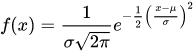.  

The parameter $\mu$ is the mean or expectation of the distribution (and also its median and mode), while the parameter $\sigma$  is its standard deviation. The variance of the distribution is $\sigma ^{2}$. A random variable with a Gaussian distribution is said to be normally distributed, ~N($\mu$,$\sigma ^{2}$)

Let's start the same as for the discrete probability distributions that we looked at, by creatimg some simulated data that has a normal dsitribution and plotting it. 

In [282]:
from scipy.stats import norm

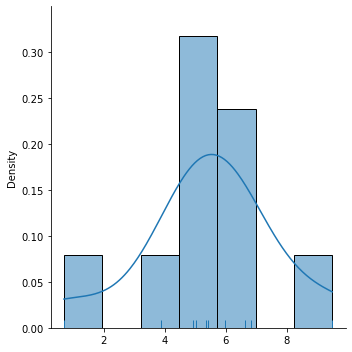

In [283]:
# simulate 10 random variables with normal distribution, mean=6, std=2
# for now let's all work with a constant random state to keep things together
normal_rvs1=norm.rvs(6,2,size=10,random_state=11)
ax=sns.displot(normal_rvs1,kde=True,stat='density',rug=True)

In [284]:
# let's look at the values
print(normal_rvs1)

[9.49890948 5.42785401 5.03086974 0.69336288 5.98343074 5.36073727
 4.92674128 6.63080534 6.84210143 3.86879404]


Let's standardize these values using the standardization:  z=(X-$\mu$)/$\sigma$.  Once you standardize these values, you can utilize the standard normal distribution.

In [285]:
stnorm1=(normal_rvs1-6)/2
print(stnorm1)

[ 1.74945474 -0.286073   -0.48456513 -2.65331856 -0.00828463 -0.31963136
 -0.53662936  0.31540267  0.42105072 -1.06560298]


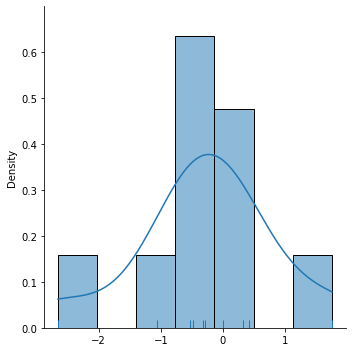

In [286]:
# You could also generate these same  10 data points from the normal dsitribution, with a mean=1 and std=0 (the standard noraml distribution)
# we are keeping the random_state constant to keep the same values
# frequency for frequency plot, density for denisty plot (toal area of bars =1), probability for total heghts =1; kde = use kernal densty estimation for plotting distribution
# rug for tick-marks for individual observations, bins=, binwidth=
normal_rvs=norm.rvs(0,1,size=10,random_state=11)
# plot with the kernal density estimate to estiamte the probability distribution
ax=sns.displot(normal_rvs,kde=True,stat='density',rug=True)

In [287]:
# the 10 standard normal random variables generated
print(normal_rvs)

[ 1.74945474 -0.286073   -0.48456513 -2.65331856 -0.00828463 -0.31963136
 -0.53662936  0.31540267  0.42105072 -1.06560298]


This gives us a list of 10 continuous random variables that have a standard normal distribution.  If we show that the standard normal distribution pdf is defined as:    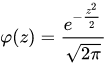, then we can calculate directly from this function to find the probability density.

In [288]:
xB=np.array([ 1.74945474, -0.286073 ,  -0.48456513 ,-2.65331856, -0.00828463, -0.31963136,  -0.53662936,  0.31540267 , 0.42105072 ,-1.06560298])
pdf_normalB=((1/(np.sqrt((2*np.pi)))) * (np.power(np.e,-(np.power((xB),2)/2))))

In [289]:
print(pdf_normalB)

[0.08635967 0.38294749 0.35475062 0.01180788 0.39892859 0.37907522
 0.34544423 0.37958453 0.36510132 0.22611911]


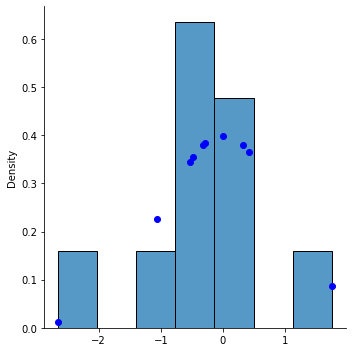

In [290]:
# We cn plot these to show the same probability distributon, using the pdf values from the pdf formula
sns.displot(xB,stat='density')
plt.plot(xB,pdf_normalB,'bo')

In [291]:
# the pdf vales of these 10 variables usng the theoretical pdf function from stats.norm gives thses values
normal_pdfA=norm.pdf(normal_rvs)
print(normal_pdfA)

[0.08635967 0.38294749 0.35475062 0.01180788 0.39892859 0.37907521
 0.34544423 0.37958453 0.36510132 0.22611911]


We can take any range of random continuous variables and pas them to this standard normal distribution pdf formula, with mean=0 and std=1, to get a corresponding y value that is the pdf value with a standard normal distribution.  We can then plot it to see the standard normal distribution.

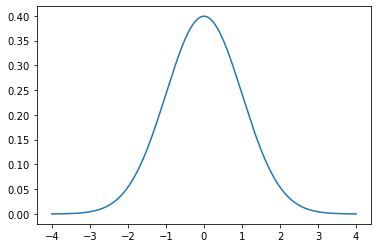

In [292]:
xC=np.linspace(-4,4,10000)
pdf_normalC=((1/(np.sqrt((2*np.pi)))) * (np.power(np.e,-(np.power((xC),2)/2))))
plt.plot(xC,pdf_normalC)

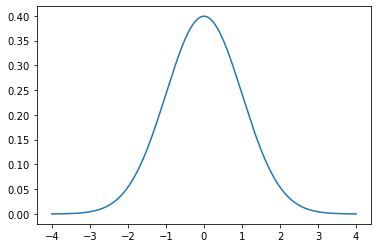

In [293]:
# Or plot from the theoretical pdf to do this for you
normal_A=norm.pdf(xC,loc=0,scale=1)
ax1=sns.lineplot(x=xC,y=normal_A)

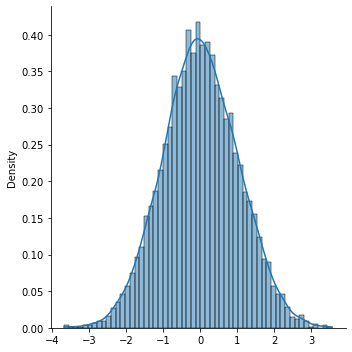

In [294]:
# Or just call the stats.norm rvs function that creates these values and the will plot them along with an estimated density
standard_normal_rvs=norm.rvs(0,1,size=10000)
ax=sns.displot(standard_normal_rvs,kde=True,stat='density')

# The area under the pdf (the normal curve) is the probability.  
This is the cumulative distribution function or  the CDF and is the intergration of the PDF.  This defines the probabilty of the normal random variable taking a value less than or equal to x.  To use the standard normal distribution we will be using the CDF of the distribution to find the probability and not the PDF since continuous random variables have zero point probabilities. This is what is found in the standrd normal tables. 

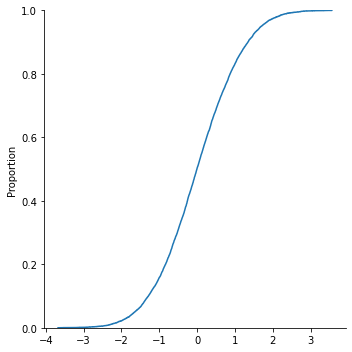

In [297]:
# Plot the CDF of this standard normal distribution
ax=sns.displot(standard_normal_rvs,kind='ecdf')

# Next is how to use the area under the standard normal distribution to find probabilties of a value in the distribution.

**Find the probability of a value being less than or equal to some value in the normal distribution**

In [324]:
# Find the probability of a value being less than or equal to some value in the distribution
# let x=stick stiffnes, x~N(mean=11.38 kN/m,variance=0.01)
# What is the probability of x <= 11.26
# Standardize to create a z-score = (x-mean)/sqrt(var) = (x-mean)/std
z= (11.26-11.38)/np.sqrt(0.01)
print(z)

-1.20000000000001


In [325]:
# Find the area under a standard normal curve with z<= -1.2

Text(0.5, 1.0, 'Normal Distribution with Mean=0, SD=1')

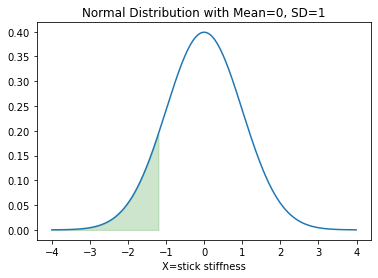

In [326]:
# We will plot this on the pdf
x_A = np.arange(-4,4,.01)
normal_A=norm.pdf(x_A,loc=0,scale=1)
ax1=sns.lineplot(x=x_A,y=normal_A)
ax2=plt.fill_between(x_A,normal_A, where=(x_A <-1.2),color='g',alpha=.2)
plt.xlabel("X=stick stiffness")
plt.title("Normal Distribution with Mean=0, SD=1")

Text(0.5, 1.0, 'Normal Distribution with Mean=0, SD=1')

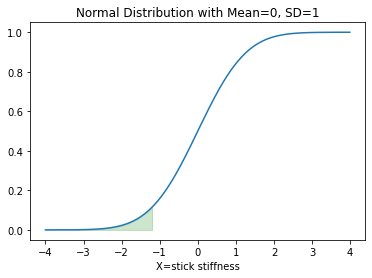

In [327]:
# The probability is the area under this curve less than z=-1.2
# This is the CDF of the the standard normal dsitribution up to this value
normal_B=norm.cdf(x_A,loc=0,scale=1)
ax1=sns.lineplot(x=x_A,y=normal_B)
ax2=plt.fill_between(x_A,normal_B, where=(x_A <-1.2),color='g',alpha=.2)
plt.xlabel("X=stick stiffness")
plt.title("Normal Distribution with Mean=0, SD=1")

In [328]:
# You can find this value by looking it up on a standard normal table or calling it here
norm.cdf(-1.2)

0.11506967022170822

The probability is 0.115 that the z-score is less thabor equal to -1.2

Text(0.5, 1.0, 'Normal Distribution with Mean=11.38, SD=0.1')

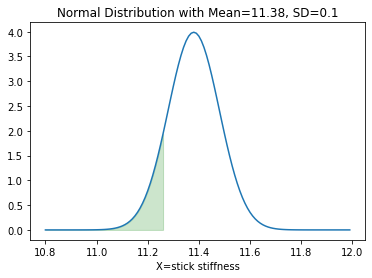

In [329]:
#  This is the same as finding this on the unstandarized pdf and letting python run the standardization
x_D = np.arange(10.8,12,.01)
normal_D=norm.pdf(x_D,loc=11.38,scale=.1)
ax1=sns.lineplot(x=x_D,y=normal_D)
ax2=plt.fill_between(x_D,normal_D, where=(x_D <11.26),color='g',alpha=.2)
plt.xlabel("X=stick stiffness")
plt.title("Normal Distribution with Mean=11.38, SD=0.1")

In [330]:
# The probability of finding x<= 11.26
norm.cdf(11.26,loc=11.38,scale=0.1)

0.11506967022170633

**Find the probability of a value being greater than or equal to some value in the normal distribution**

In [335]:
# Find the probability of a value being greater than or equal to some value in the distribution
# let x=stick stiffnes, x~N(mean=11.38 kN/m,variance=0.01)
# What is the probability of x >= 11.26
# Standardize to create a z-score = (x-mean)/sqrt(var) = (x-mean)/std
z= (11.26-11.38)/np.sqrt(0.01)
print(z)

-1.20000000000001


Text(0.5, 1.0, 'Normal Distribution with Mean=0, SD=1')

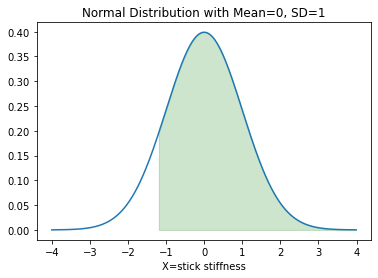

In [336]:
# We will plot this on the pdf
x_A = np.arange(-4,4,.01)
normal_A=norm.pdf(x_A,loc=0,scale=1)
ax1=sns.lineplot(x=x_A,y=normal_A)
ax2=plt.fill_between(x_A,normal_A, where=(x_A >-1.2),color='g',alpha=.2)
plt.xlabel("X=stick stiffness")
plt.title("Normal Distribution with Mean=0, SD=1")

In [337]:
# Remember that the entire area under the curve is 1, so the area to the right of z=-1.2 is = 1-area t o the left of z=-1.2
1-norm.cdf(-1.2)

0.8849303297782918

In [338]:
# You can also specifically ask for the right tail probability by usinng the survival function sf=(1-cdf)
norm.sf(-1.2)

0.8849303297782918

**Find the probability of a value being between two values on the normal distribution**

In [340]:
# You have a batch process with normally distributed yields x~N(85,16); mean=85, variance=16
# What is the probability of yield values being between 77 adn 93g/L?
# standardize the values
z1=(77-85)/np.sqrt(16)
z2=(93-85)/np.sqrt(16)
print(z1)
print(z2)

-2.0
2.0


Text(0.5, 1.0, 'Normal Distribution with Mean=0, SD=1')

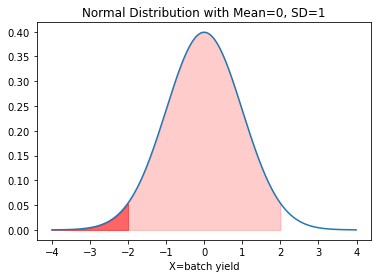

In [346]:
x_A = np.arange(-4,4,.01)
normal_A=norm.pdf(x_A,loc=0,scale=1)
ax1=sns.lineplot(x=x_A,y=normal_A)
ax2=plt.fill_between(x_A,normal_A, where=(x_A <-2),color='r',alpha=.5)
ax3=plt.fill_between(x_A,normal_A, where=(x_A <2), color='r', alpha=.2)
plt.xlabel("X=batch yield")
plt.title("Normal Distribution with Mean=0, SD=1")

In [357]:
# You want the probability or the are under the curve between the z-values of -2 and 2
# subtract the area to the left of -2 from the area to the left of 2
print(norm.cdf(2))
print(norm.cdf(-2))
print("cdf of (z=2) - cdf of (z=-2) = " + str(norm.cdf(2) - norm.cdf(-2)))

0.9772498680518208
0.022750131948179195
cdf of (z=2) - cdf of (z=-2) = 0.9544997361036416


Text(0.5, 1.0, 'Normal Distribution with Mean=85, SD=4')

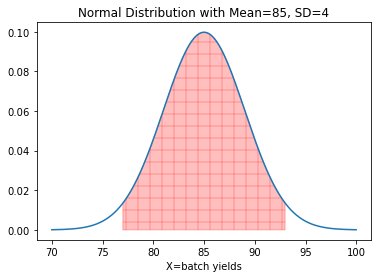

In [358]:
x_B = np.arange(70,100,.01)
normal_B=norm.pdf(x_B,loc=85,scale=4)
ax=sns.lineplot(x=x_B,y=normal_B)
ax=plt.fill_between(x_B, normal_B, where=((x_B>77) & (x_B<93)),color='r',alpha=.25,hatch="+")
plt.xlabel("X=batch yields")
plt.title("Normal Distribution with Mean=85, SD=4")